In [59]:
import pandas as pd
import numpy as np

## Preaparing the Data

- Downloading the data
- Adjusting the column names

In [161]:
!wget https://github.com/danietakeshi/ml-zoomcamp-project-1/blob/main/data/CrabAgePrediction.csv

--2023-11-03 12:15:00--  https://github.com/danietakeshi/ml-zoomcamp-project-1/blob/main/data/CrabAgePrediction.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 333859 (326K) [text/plain]
Saving to: 'CrabAgePrediction.csv'

     0K .......... .......... .......... .......... .......... 15%  175K 2s
    50K .......... .......... .......... .......... .......... 30%  350K 1s
   100K .......... .......... .......... .......... .......... 46% 12,5M 1s
   150K .......... .......... .......... .......... .......... 61%  363K 0s
   200K .......... .......... .......... .......... .......... 76% 8,35M 0s
   250K .......... .......... .......... .......... .......... 92% 21,1M 0s
   300K .......... .......... ......                          100%  121M=0,6s

2023-11-03 12:15:02 (563 KB/s) - 'CrabAgePrediction.csv' saved [333859/333859]



In [162]:
df = pd.read_csv('CrabAgePrediction.csv')

In [61]:
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [62]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

## Exploratory data analysis (EDA)

- Checking for null values
- Getting number of unique values per column

In [63]:
df.isnull().sum()

sex               0
length            0
diameter          0
height            0
weight            0
shucked_weight    0
viscera_weight    0
shell_weight      0
age               0
dtype: int64

In [64]:
df.nunique()

sex                  3
length             134
diameter           111
height              51
weight            2343
shucked_weight    1482
viscera_weight     867
shell_weight       907
age                 28
dtype: int64

In [65]:
df.describe()

,length,diameter,height,weight,shucked_weight,viscera_weight,shell_weight,age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [66]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])  # Display the first 5 unique values
    print(df[col].nunique())    # Display the number of unique values
    print()

sex
['F' 'M' 'I']
3

length
[1.4375 0.8875 1.0375 1.175  1.55  ]
134

diameter
[1.175  0.65   0.775  0.8875 0.6625]
111

height
[0.4125 0.2125 0.25   0.35   0.325 ]
51

weight
[24.6357155   5.40057975  7.95203475 13.48018725  6.90310325]
2343

shucked_weight
[12.3320325   2.2963095   3.231843    4.74854125  3.458639  ]
1482

viscera_weight
[5.5848515  1.37495075 1.60174675 2.28213475 1.48834875]
867

shell_weight
[6.747181   1.5592225  2.76407625 5.2446575  1.70097   ]
907

age
[ 9  6 10  8 15]
28



- **sex**: Gender of the Crab - Male, Female and Indeterminate.
- **length**: Length of the Crab (in Feet; 1 foot = 30.48 cms)
- **diameter**: Diameter of the Crab (in Feet; 1 foot = 30.48 cms)
- **height**: Height of the Crab (in Feet; 1 foot = 30.48 cms)
- **weight**: Weight of the Crab (in ounces; 1 Pound = 16 ounces)
- **shucked_weight**: Weight without the shell (in ounces; 1 Pound = 16 ounces)
- **viscera_weight**: is weight that wraps around your abdominal organs deep inside body (in ounces; 1 Pound = 16 ounces)
- **shell_weight**: Weight of the Shell (in ounces; 1 Pound = 16 ounces)
- **age**: Age of the Crab (in months)

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='age', ylabel='Count'>

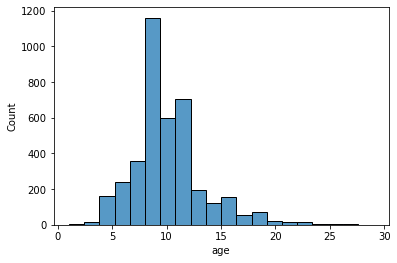

In [68]:
sns.histplot(df.age, bins=20)

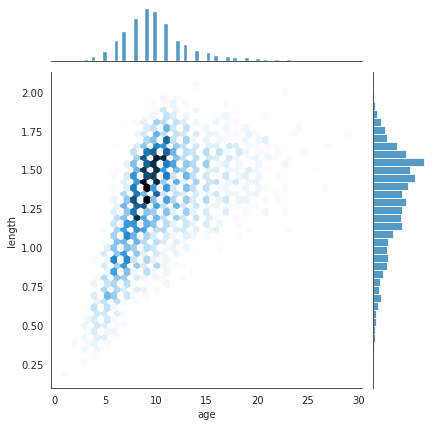

In [69]:
with sns.axes_style('white'):
    g = sns.jointplot(x="age", y="length", data=df, kind='hex')

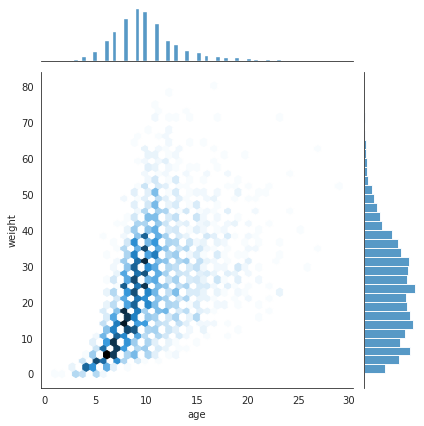

In [70]:
with sns.axes_style('white'):
    g = sns.jointplot(x="age", y="weight", data=df, kind='hex');

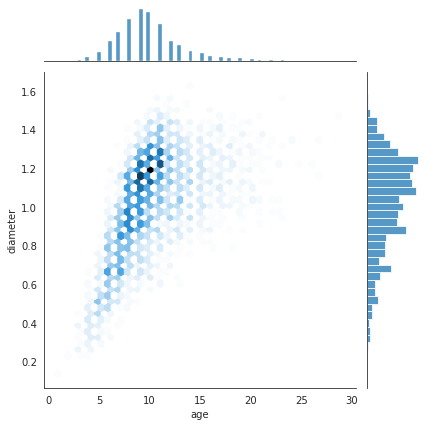

In [71]:
with sns.axes_style('white'):
    g = sns.jointplot(x="age", y="diameter", data=df, kind='hex')

<AxesSubplot:xlabel='age'>

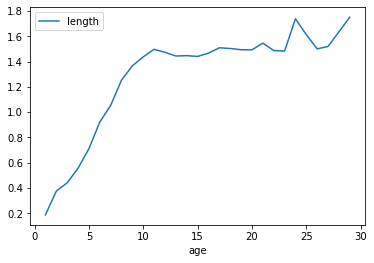

In [72]:
df.groupby(['age'])[['length']].mean().plot(legend=True)

<AxesSubplot:xlabel='age'>

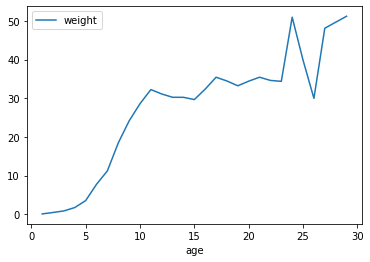

In [73]:
df.groupby(['age'])['weight'].mean().plot(legend=True)

<AxesSubplot:xlabel='age'>

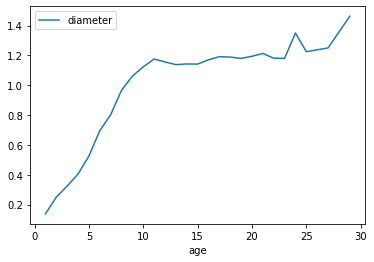

In [74]:
df.groupby(['age'])['diameter'].mean().plot(legend=True)

In [75]:
df.groupby(['age'])[['length', 'weight', 'diameter']].mean()

,length,weight,diameter
age,,,
1,0.187500,0.056699,0.137500
2,0.375000,0.425243,0.250000
3,0.441346,0.831949,0.324038
4,0.555896,1.707389,0.404953
5,0.710514,3.499574,0.525000
6,0.920954,7.724768,0.695176
7,1.052556,11.210639,0.802101
8,1.252668,18.431482,0.965865
9,1.365977,24.140153,1.061328


In [76]:
df = df[df.height != 0]

In [77]:
for column in ['length', 'diameter', 'height']:
    df[column] = df[column] * 0.3048

In [78]:
df.head()

,sex,length,diameter,height,weight,shucked_weight,viscera_weight,shell_weight,age
0,F,0.43815,0.35814,0.12573,24.635715,12.332033,5.584852,6.747181,9
1,M,0.27051,0.19812,0.06477,5.400580,2.296310,1.374951,1.559222,6
2,I,0.31623,0.23622,0.07620,7.952035,3.231843,1.601747,2.764076,6
3,F,0.35814,0.27051,0.07620,13.480187,4.748541,2.282135,5.244657,10
4,I,0.27051,0.20193,0.06477,6.903103,3.458639,1.488349,1.700970,6


In [79]:
for column in ['weight', 'shucked_weight', 'viscera_weight', 'shell_weight']:
    df[column] = df[column] / 35.274

In [80]:
df.head()

,sex,length,diameter,height,weight,shucked_weight,viscera_weight,shell_weight,age
0,F,0.43815,0.35814,0.12573,0.698410,0.349607,0.158328,0.191279,9
1,M,0.27051,0.19812,0.06477,0.153104,0.065099,0.038979,0.044203,6
2,I,0.31623,0.23622,0.07620,0.225436,0.091621,0.045409,0.078360,6
3,F,0.35814,0.27051,0.07620,0.382156,0.134619,0.064697,0.148683,10
4,I,0.27051,0.20193,0.06477,0.195699,0.098051,0.042194,0.048222,6


### Feature Engineering

4 new features were created:

1. BMI: Body Mass Index
2. Density
3. Height above Average
4. Weight above average

In [81]:
df['bmi'] = df.weight / df.height ** 2
df['density'] = df.weight / (df.height * df.length * df.diameter)

In [82]:
df['height_above_average'] = (df.height > df.height.mean()).astype(int)
df['weight_above_average'] = (df.weight > df.weight.mean()).astype(int)

In [83]:
df.head()

,sex,length,diameter,height,weight,shucked_weight,viscera_weight,shell_weight,age,bmi,density,height_above_average,weight_above_average
0,F,0.43815,0.35814,0.12573,0.698410,0.349607,0.158328,0.191279,9,44.180705,35.399401,1,1
1,M,0.27051,0.19812,0.06477,0.153104,0.065099,0.038979,0.044203,6,36.495379,44.106250,0,0
2,I,0.31623,0.23622,0.07620,0.225436,0.091621,0.045409,0.078360,6,38.825192,39.604894,0,0
3,F,0.35814,0.27051,0.07620,0.382156,0.134619,0.064697,0.148683,10,65.815968,51.766653,0,0
4,I,0.27051,0.20193,0.06477,0.195699,0.098051,0.042194,0.048222,6,46.648949,55.313558,0,0


In [84]:
columns = ['length', 'diameter', 'height', 'weight', 'bmi', 'density', 'height_above_average', 'weight_above_average']
column_filter = ['sex', 'length', 'diameter', 'height', 'weight', 'bmi', 'density', 'age', 'height_above_average', 'weight_above_average']

In [85]:
df = df[column_filter]

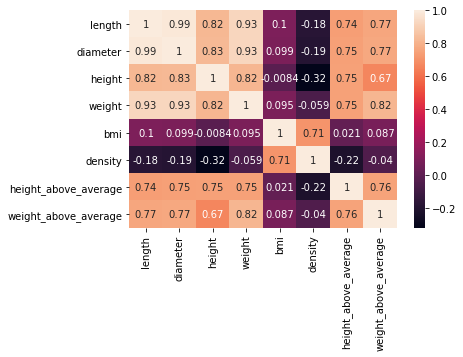

In [86]:
corr_matrix = df[columns].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [89]:
len(df_train), len(df_val), len(df_test)

(2334, 778, 779)

In [90]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [91]:
y_train = df_train.age.values
y_full_train = df_full_train.age.values
y_val = df_val.age.values
y_test = df_test.age.values

In [92]:
del df_train['age']
del df_full_train['age']
del df_val['age']
del df_test['age']

In [93]:
df_train

,sex,length,diameter,height,weight,bmi,density,height_above_average,weight_above_average
0,I,0.40386,0.32004,0.09906,0.528831,53.891459,41.303149,0,0
1,F,0.51054,0.38481,0.13335,0.815348,45.851833,31.122437,1,1
2,I,0.16383,0.12954,0.04191,0.048623,27.682847,54.667735,0,0
3,F,0.41148,0.32004,0.09906,0.603172,61.467386,46.237045,0,0
4,M,0.49149,0.39243,0.14097,1.173795,59.066176,43.170658,1,1
...,...,...,...,...,...,...,...,...,...
2329,M,0.34290,0.25527,0.10668,0.371708,32.661522,39.806332,1,0
2330,F,0.43815,0.36195,0.12192,0.719306,48.390913,37.202093,1,1
2331,F,0.36957,0.27813,0.10668,0.497888,43.748784,45.405081,1,0
2332,I,0.13716,0.09906,0.03429,0.022102,18.796995,47.438408,0,0


In [94]:
from sklearn.feature_extraction import DictVectorizer

In [95]:
dv = DictVectorizer(sparse = False)

In [96]:
X_train = dv.fit_transform(df_train.to_dict(orient='records'))
X_val = dv.transform(df_val.to_dict(orient='records'))
X_test = dv.transform(df_test.to_dict(orient='records'))

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
model = LogisticRegression(solver='liblinear', C=0.01, max_iter=1000, random_state=42)

In [99]:
X_train

array([[5.38914588e+01, 4.13031487e+01, 3.20040000e-01, ...,
        0.00000000e+00, 5.28830612e-01, 0.00000000e+00],
       [4.58518333e+01, 3.11224373e+01, 3.84810000e-01, ...,
        0.00000000e+00, 8.15347501e-01, 1.00000000e+00],
       [2.76828466e+01, 5.46677353e+01, 1.29540000e-01, ...,
        0.00000000e+00, 4.86234833e-02, 0.00000000e+00],
       ...,
       [4.37487843e+01, 4.54050806e+01, 2.78130000e-01, ...,
        0.00000000e+00, 4.97888395e-01, 0.00000000e+00],
       [1.87969946e+01, 4.74384075e+01, 9.90600000e-02, ...,
        0.00000000e+00, 2.21015833e-02, 0.00000000e+00],
       [6.99806562e+01, 4.96052489e+01, 3.46710000e-01, ...,
        0.00000000e+00, 8.54326657e-01, 1.00000000e+00]])

In [100]:
model.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=1000, random_state=42, solver='liblinear')

In [101]:
y_pred = model.predict_proba(X_val)[:, 1]

In [102]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [103]:
rmse(y_val, y_pred)

10.459331792885225

In [104]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

In [105]:
dt = DecisionTreeRegressor(max_depth=3)

In [106]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [107]:
y_pred = dt.predict(X_val)

In [108]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- height <= 0.09
|   |--- diameter <= 0.18
|   |   |--- diameter <= 0.14
|   |   |   |--- value: [4.43]
|   |   |--- diameter >  0.14
|   |   |   |--- value: [6.09]
|   |--- diameter >  0.18
|   |   |--- sex=I <= 0.50
|   |   |   |--- value: [9.25]
|   |   |--- sex=I >  0.50
|   |   |   |--- value: [7.44]
|--- height >  0.09
|   |--- height <= 0.12
|   |   |--- sex=I <= 0.50
|   |   |   |--- value: [10.60]
|   |   |--- sex=I >  0.50
|   |   |   |--- value: [9.52]
|   |--- height >  0.12
|   |   |--- height <= 0.16
|   |   |   |--- value: [11.96]
|   |   |--- height >  0.16
|   |   |   |--- value: [14.33]



In [109]:
rmse(y_val, y_pred)

2.5931020105145444

In [110]:
y_pred_train = dt.predict(X_train)

In [111]:
rmse(y_train, y_pred_train)

2.5616686258885712

In [112]:
from sklearn.ensemble import RandomForestRegressor

In [113]:
rf = RandomForestRegressor(n_estimators=100, random_state=1, max_depth=8, n_jobs=-1)

In [114]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, n_jobs=-1, random_state=1)

In [115]:
y_pred = rf.predict(X_val)

In [116]:
rmse(y_val, y_pred)

2.5639279043297516

In [117]:
feature_names=list(dv.get_feature_names_out())

In [118]:
feature_importances = list(zip(feature_names, rf.feature_importances_))

In [119]:
importance_df = pd.DataFrame(feature_importances, columns=['feature_names', 'feature_importances'])

In [120]:
importance_df = importance_df.sort_values(by='feature_importances', ascending=False)

Text(0.5, 1.0, 'Feature Importance Chart')

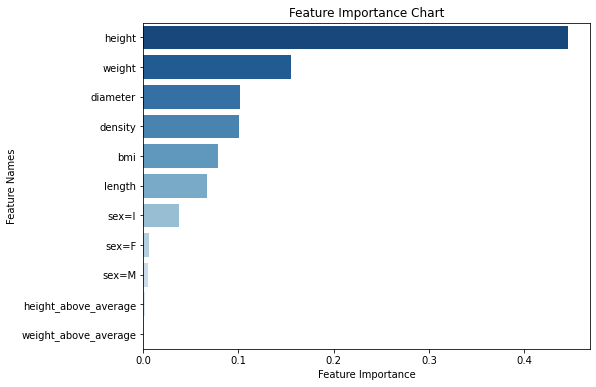

In [121]:
plt.figure(figsize=(8, 6))
sns.barplot(x='feature_importances', y='feature_names', data=importance_df, palette='Blues_r')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance Chart')

In [122]:
import xgboost as xgb

In [123]:
dv = DictVectorizer(sparse = False)

In [124]:
filter_col = ['height', 'weight', 'density', 'bmi', 'diameter', 'length', 'sex']
X_train = dv.fit_transform(df_train[filter_col].to_dict(orient='records'))
X_val = dv.transform(df_val[filter_col].to_dict(orient='records'))
X_test = dv.transform(df_test[filter_col].to_dict(orient='records'))

In [125]:
features = dv.get_feature_names_out().tolist()
features

['bmi',
 'density',
 'diameter',
 'height',
 'length',
 'sex=F',
 'sex=I',
 'sex=M',
 'weight']

In [126]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [127]:
features

['bmi',
 'density',
 'diameter',
 'height',
 'length',
 'sex=F',
 'sex=I',
 'sex=M',
 'weight']

In [128]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [129]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [130]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [131]:
scores = {}

In [132]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

In [133]:
scores

{'eta=0.3':     num_iter  train_auc  val_auc
 0          0    2.83026  2.91506
 1          5    2.17574  2.55821
 2         10    1.94951  2.56835
 3         15    1.85383  2.60581
 4         20    1.73486  2.63040
 5         25    1.61256  2.66294
 6         30    1.53811  2.67867
 7         35    1.43763  2.70772
 8         40    1.35083  2.72581
 9         45    1.27505  2.74588
 10        50    1.22785  2.75858
 11        55    1.15921  2.77537
 12        60    1.08078  2.79338
 13        65    1.01788  2.80782
 14        70    0.96376  2.80908
 15        75    0.91570  2.81295
 16        80    0.85802  2.81504
 17        85    0.82252  2.81684
 18        90    0.78902  2.81999
 19        95    0.74538  2.82043
 20        99    0.72184  2.82374}

In [134]:
y_pred = model.predict(dval)

In [135]:
rmse(y_val, y_pred)

2.823735939233956

In [136]:
from sklearn.metrics import roc_auc_score

In [137]:
scores = {}

for eta in ['0.1', '0.2', '0.3', '0.4', '0.5']:
    for max_depth in range(1, 11):
        key = f'eta={eta}-max_depth={max_depth}'
        print(key)
        xgb_params = {
            'eta': eta, 
            'max_depth': max_depth,
            'min_child_weight': 1,

            'objective': 'reg:squarederror',
            'nthread': 8,

            'seed': 1,
            'verbosity': 1,
        }

        model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                          verbose_eval=5,
                          evals=watchlist)
        
        y_pred = model.predict(dval)
        score = rmse(y_val, y_pred)
        
        scores[key] = score
        

eta=0.1-max_depth=1
[0]	train-rmse:3.16259	val-rmse:3.18647
[5]	train-rmse:2.91094	val-rmse:2.92521
[10]	train-rmse:2.77338	val-rmse:2.78586
[15]	train-rmse:2.69051	val-rmse:2.70334
[20]	train-rmse:2.63785	val-rmse:2.65531
[25]	train-rmse:2.60426	val-rmse:2.62141
[30]	train-rmse:2.58165	val-rmse:2.59972
[35]	train-rmse:2.56558	val-rmse:2.58515
[40]	train-rmse:2.55422	val-rmse:2.57622
[45]	train-rmse:2.54612	val-rmse:2.57073
[50]	train-rmse:2.54034	val-rmse:2.56600
[55]	train-rmse:2.53579	val-rmse:2.56405
[60]	train-rmse:2.53204	val-rmse:2.56201
[65]	train-rmse:2.52871	val-rmse:2.56025
[70]	train-rmse:2.52568	val-rmse:2.55949
[75]	train-rmse:2.52290	val-rmse:2.55777
[80]	train-rmse:2.52033	val-rmse:2.55675
[85]	train-rmse:2.51790	val-rmse:2.55568
[90]	train-rmse:2.51559	val-rmse:2.55512
[95]	train-rmse:2.51332	val-rmse:2.55469
[99]	train-rmse:2.51165	val-rmse:2.55426
eta=0.1-max_depth=2
[0]	train-rmse:3.13618	val-rmse:3.16004
[5]	train-rmse:2.80549	val-rmse:2.82943
[10]	train-rmse:2.651

[30]	train-rmse:1.20496	val-rmse:2.67412
[35]	train-rmse:1.11435	val-rmse:2.68519
[40]	train-rmse:1.03045	val-rmse:2.69226
[45]	train-rmse:0.94156	val-rmse:2.69443
[50]	train-rmse:0.86321	val-rmse:2.70289
[55]	train-rmse:0.81440	val-rmse:2.70959
[60]	train-rmse:0.77327	val-rmse:2.71656
[65]	train-rmse:0.72575	val-rmse:2.72272
[70]	train-rmse:0.68188	val-rmse:2.72539
[75]	train-rmse:0.63757	val-rmse:2.72847
[80]	train-rmse:0.59540	val-rmse:2.73263
[85]	train-rmse:0.56178	val-rmse:2.73699
[90]	train-rmse:0.52794	val-rmse:2.74387
[95]	train-rmse:0.50202	val-rmse:2.74416
[99]	train-rmse:0.49143	val-rmse:2.74552
eta=0.2-max_depth=1
[0]	train-rmse:3.09086	val-rmse:3.11388
[5]	train-rmse:2.74766	val-rmse:2.75650
[10]	train-rmse:2.62501	val-rmse:2.64100
[15]	train-rmse:2.57534	val-rmse:2.59995
[20]	train-rmse:2.55173	val-rmse:2.57953
[25]	train-rmse:2.53985	val-rmse:2.56979
[30]	train-rmse:2.53164	val-rmse:2.56561
[35]	train-rmse:2.52531	val-rmse:2.56262
[40]	train-rmse:2.51995	val-rmse:2.5615

[60]	train-rmse:0.57657	val-rmse:2.73174
[65]	train-rmse:0.53175	val-rmse:2.73951
[70]	train-rmse:0.50171	val-rmse:2.73971
[75]	train-rmse:0.47837	val-rmse:2.74286
[80]	train-rmse:0.44433	val-rmse:2.74928
[85]	train-rmse:0.41219	val-rmse:2.74928
[90]	train-rmse:0.38900	val-rmse:2.74737
[95]	train-rmse:0.35408	val-rmse:2.75023
[99]	train-rmse:0.33048	val-rmse:2.75452
eta=0.2-max_depth=10
[0]	train-rmse:2.86868	val-rmse:3.02299
[5]	train-rmse:1.85761	val-rmse:2.66185
[10]	train-rmse:1.41504	val-rmse:2.62108
[15]	train-rmse:1.12577	val-rmse:2.65056
[20]	train-rmse:0.97850	val-rmse:2.67894
[25]	train-rmse:0.85569	val-rmse:2.69455
[30]	train-rmse:0.76243	val-rmse:2.70926
[35]	train-rmse:0.68946	val-rmse:2.71842
[40]	train-rmse:0.62104	val-rmse:2.72947
[45]	train-rmse:0.55313	val-rmse:2.74251
[50]	train-rmse:0.49016	val-rmse:2.75016
[55]	train-rmse:0.41629	val-rmse:2.75489
[60]	train-rmse:0.35652	val-rmse:2.75870
[65]	train-rmse:0.32704	val-rmse:2.76035
[70]	train-rmse:0.29328	val-rmse:2.763

[95]	train-rmse:0.25275	val-rmse:2.83012
[99]	train-rmse:0.23422	val-rmse:2.83279
eta=0.3-max_depth=9
[0]	train-rmse:2.72407	val-rmse:2.92222
[5]	train-rmse:1.65907	val-rmse:2.66328
[10]	train-rmse:1.31196	val-rmse:2.69416
[15]	train-rmse:1.08104	val-rmse:2.74327
[20]	train-rmse:0.92782	val-rmse:2.77349
[25]	train-rmse:0.81187	val-rmse:2.77886
[30]	train-rmse:0.72566	val-rmse:2.78244
[35]	train-rmse:0.60832	val-rmse:2.79373
[40]	train-rmse:0.52153	val-rmse:2.79905
[45]	train-rmse:0.47231	val-rmse:2.80490
[50]	train-rmse:0.41654	val-rmse:2.80594
[55]	train-rmse:0.36403	val-rmse:2.80789
[60]	train-rmse:0.33769	val-rmse:2.80963
[65]	train-rmse:0.30120	val-rmse:2.81495
[70]	train-rmse:0.26334	val-rmse:2.81675
[75]	train-rmse:0.23273	val-rmse:2.81774
[80]	train-rmse:0.20644	val-rmse:2.82212
[85]	train-rmse:0.18428	val-rmse:2.82354
[90]	train-rmse:0.16334	val-rmse:2.82508
[95]	train-rmse:0.15146	val-rmse:2.82450
[99]	train-rmse:0.13433	val-rmse:2.82660
eta=0.3-max_depth=10
[0]	train-rmse:2.6

[25]	train-rmse:0.89037	val-rmse:2.85033
[30]	train-rmse:0.76900	val-rmse:2.87444
[35]	train-rmse:0.67620	val-rmse:2.88631
[40]	train-rmse:0.59935	val-rmse:2.89688
[45]	train-rmse:0.53269	val-rmse:2.90662
[50]	train-rmse:0.45816	val-rmse:2.91555
[55]	train-rmse:0.40384	val-rmse:2.91573
[60]	train-rmse:0.36415	val-rmse:2.92094
[65]	train-rmse:0.30382	val-rmse:2.93004
[70]	train-rmse:0.27078	val-rmse:2.93150
[75]	train-rmse:0.22734	val-rmse:2.93284
[80]	train-rmse:0.20114	val-rmse:2.93400
[85]	train-rmse:0.17770	val-rmse:2.93353
[90]	train-rmse:0.15817	val-rmse:2.93655
[95]	train-rmse:0.14052	val-rmse:2.93725
[99]	train-rmse:0.13117	val-rmse:2.93870
eta=0.4-max_depth=9
[0]	train-rmse:2.57147	val-rmse:2.84036
[5]	train-rmse:1.56396	val-rmse:2.69067
[10]	train-rmse:1.24264	val-rmse:2.74362
[15]	train-rmse:0.91394	val-rmse:2.79776
[20]	train-rmse:0.77482	val-rmse:2.81837
[25]	train-rmse:0.67110	val-rmse:2.82632
[30]	train-rmse:0.52434	val-rmse:2.84821
[35]	train-rmse:0.43027	val-rmse:2.8627

[55]	train-rmse:0.44907	val-rmse:2.93298
[60]	train-rmse:0.40063	val-rmse:2.93725
[65]	train-rmse:0.36471	val-rmse:2.94703
[70]	train-rmse:0.32189	val-rmse:2.94988
[75]	train-rmse:0.28754	val-rmse:2.95317
[80]	train-rmse:0.25081	val-rmse:2.95313
[85]	train-rmse:0.22540	val-rmse:2.95521
[90]	train-rmse:0.20387	val-rmse:2.95649
[95]	train-rmse:0.18806	val-rmse:2.95609
[99]	train-rmse:0.16699	val-rmse:2.95799
eta=0.5-max_depth=8
[0]	train-rmse:2.49448	val-rmse:2.80302
[5]	train-rmse:1.55839	val-rmse:2.75633
[10]	train-rmse:1.26350	val-rmse:2.81314
[15]	train-rmse:1.03661	val-rmse:2.87418
[20]	train-rmse:0.83643	val-rmse:2.88741
[25]	train-rmse:0.72983	val-rmse:2.91455
[30]	train-rmse:0.62897	val-rmse:2.92470
[35]	train-rmse:0.54101	val-rmse:2.93804
[40]	train-rmse:0.45356	val-rmse:2.93968
[45]	train-rmse:0.36489	val-rmse:2.95010
[50]	train-rmse:0.30454	val-rmse:2.95607
[55]	train-rmse:0.25448	val-rmse:2.95694
[60]	train-rmse:0.22175	val-rmse:2.96154
[65]	train-rmse:0.18726	val-rmse:2.9648

In [138]:
df_score = pd.DataFrame.from_dict(scores, orient='index', columns=['score'])

In [139]:
df_score.sort_values(by='score')

,score
eta=0.1-max_depth=2,2.529173
eta=0.1-max_depth=3,2.532838
eta=0.2-max_depth=2,2.544346
eta=0.2-max_depth=1,2.550131
eta=0.3-max_depth=1,2.551840
eta=0.1-max_depth=1,2.554257
eta=0.5-max_depth=1,2.555268
eta=0.1-max_depth=4,2.555538
eta=0.4-max_depth=1,2.559120
eta=0.3-max_depth=2,2.563320


In [142]:
filter_col = ['height', 'weight', 'density', 'bmi', 'diameter', 'length', 'sex']
dv = DictVectorizer(sparse = False)
X_full_train = dv.fit_transform(df_full_train[filter_col].to_dict(orient='records'))
X_test = dv.transform(df_test[filter_col].to_dict(orient='records'))
features = dv.get_feature_names_out().tolist()

In [143]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

In [144]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=1000,
                  verbose_eval=50)

In [145]:
y_pred = model.predict(dfulltrain)
score_val = rmse(y_full_train, y_pred)
score_val

1.6416686128610172

In [146]:
y_pred = model.predict(dtest)
score_test = rmse(y_test.round(0), y_pred.round(0))
score_test

2.553660314388681

In [171]:
y_test[12], y_pred[12].round(0)

(5, 5.0)

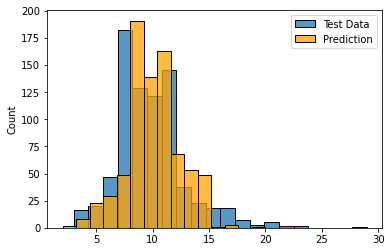

In [157]:
ax = sns.histplot(y_test, bins=20, label = "Test Data")
ax = sns.histplot(y_pred.round(0), bins=15, color='orange', label = "Prediction")
ax.legend()

In [149]:
import statistics
statistics.mode(y_test), statistics.mode(y_pred.round(0))

(9, 11.0)

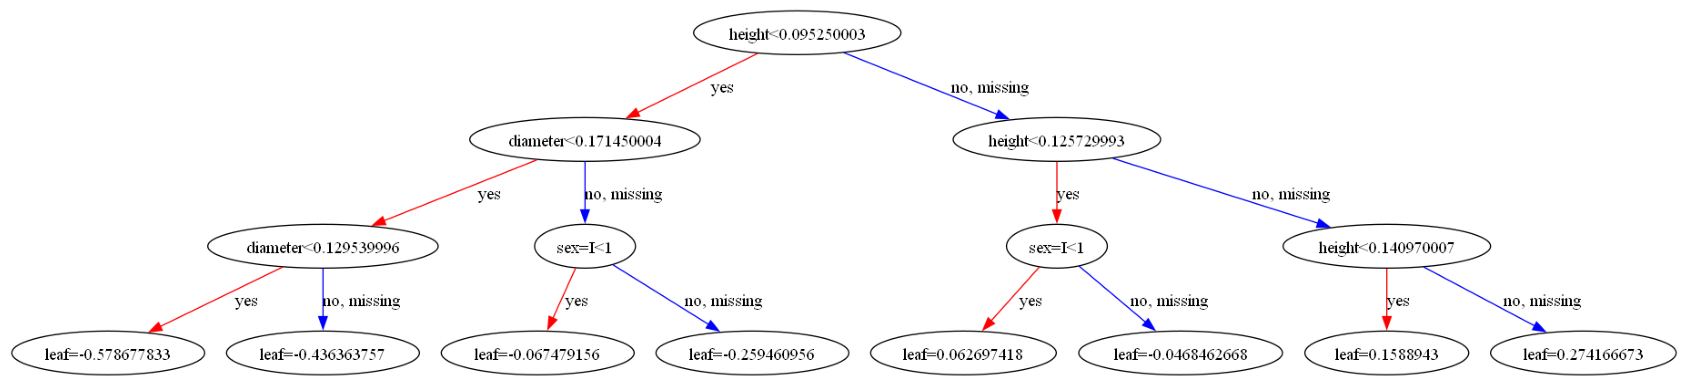

In [158]:
from xgboost import plot_tree
_, ax = plt.subplots(figsize=(30,30))
plot_tree(model, fontsize=10, ax=ax)
plt.show()

## Test API

In [174]:
import requests
url = 'http://0.0.0.0:9696/predict'

In [181]:
crab_info_1 = {
    'height': 0.14478,
     'weight': 1.199111356806713,
     'density': 39.376091640190154,
     'bmi': 57.20610404133722,
     'diameter': 0.40005,
     'length': 0.52578,
     'sex': 'F'
}

In [182]:
crab_info_2 = {
    'height': 0.045720000000000004,
     'weight': 0.07956569994897092,
     'density': 58.42414401372047,
     'bmi': 38.06391406637903,
     'diameter': 0.14478,
     'length': 0.20574000000000003,
     'sex': 'I'
}

In [183]:
r = requests.post(url, json=crab_info_1).json()
r

{'crab_age': 11.5, 'harvest': True}

In [178]:
url = 'https://crab-age-234gh2nz6a-rj.a.run.app/predict'

In [184]:
r = requests.post(url, json=crab_info_2).json()
r

{'crab_age': 5.5, 'harvest': False}